<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 6.데이터프레임 변경 (2)

- 정확한 데이터 분석을 위해서는 정확한 데이터가 준비되어야 합니다.
- 정확한 데이터 준비를 위해 누락된 데이터나 중복 데이터를 제거하는 전처리 작업이 필요합니다.

In [12]:
# 라이브러리 불러오기
import pandas as pd

## 6.1.결측치 처리

- NaN 값, 즉 결측치는 정확한 분석을 방해합니다.
- NaN 값을 만나면 오류가 발생하는 함수도 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/nan.png' width=700 align="left"/>

- NaN 값은 제거하든지 다른 값(예를 들면 평균값, 최빈값 등)으로 채워야 합니다.

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Month: 월
- Day: 일

In [13]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'
air = pd.read_csv(path)

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### 6.1.1.결측치 찾기

- 결측치 존재 여부를 확인하고 이를 어떻게 처리할 지 방법을 결정해야 합니다.
- 결측치를 확인할 수 있는 방법은 참 많습니다.

**1) info() 메소드로 확인**

In [14]:
# 값 개수로 결측치 존재 여부 확인
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


**2) isnull(), notnull() 메소드 사용**

- **isnull()** 메소드는 결측치면 True, 유효한 값이면 False를 반환합니다.
- **notnull()** 메소드는 결측치면 False, 유효한 값이면 True를 반환합니다.
- isnull() 대신 **isna()**, notnull() 대신 **notna()** 메소드를 사용해도 됩니다.

In [15]:
# 전체 데이터 중에서 결측치는 True로 표시
air.isnull()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,True,True,False,False,False,False
...,...,...,...,...,...,...
148,False,False,False,False,False,False
149,True,False,False,False,False,False
150,False,False,False,False,False,False
151,False,False,False,False,False,False


In [16]:
# 전체 데이터 중에서 결측치는 False로 표시
air.notnull()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,False,False,True,True,True,True
...,...,...,...,...,...,...
148,True,True,True,True,True,True
149,False,True,True,True,True,True
150,True,True,True,True,True,True
151,True,True,True,True,True,True


- **sum()** 메소드를 사용해 True 값의 개수, 즉 **열의 결측치 개수**를 확인할 수 있습니다.

In [17]:
# 열의 결측치 개수 확인
air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

### 6.1.2.결측치 제거

- **dropna()** 메소드로 결측치가 있는 열이나 행을 제거할 수 있습니다.
- inplace=True 옵션을 지정해야 해당 데이터프레임에 실제로 반영됩니다.
- axis 옵션으로 행을 제거할 지 열을 제거할 지 지정합니다.
    - axis=0: 행 제거(기본값)
    - axis=1: 열 제거

**1) 어떤 열이든 결측치가 있는 행 제거**

- dropna() 메소드는 기본적으로 어느 열이든 결측치가 있는 행을 제거합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_01.png' width=300 align="left"/>

In [18]:
# 데이터프레임 복사
air_test = air.copy()

# 열의 결측치 개수 확인
air_test.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [20]:
# 결측치가 하나라도 있는 행 제거
air_test = air_test.dropna()

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 특정 열에 결측치가 있는 행 제거**

- subset 옵션에 열을 지정해 해당 열에 결측치가 있는 행을 제거합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_02.png' width=300 align="left"/>

In [25]:
# 데이터프레임 복사
air_test = air.copy()

# Ozone 열이 결측치인 행 제거
air_test = air_test.dropna(subset='Ozone')

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    5
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**3) 결측치가 있는 모든 열 제거**

- axis=1 옵션을 지정해 열을 제거할 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_03.png' width=300 align="left"/>

In [26]:
# 데이터프레임 복사
air_test = air.copy()

# 결측치가 있는 열 제거
air_test = air_test.dropna(axis=1)

# 확인
air_test.isna().sum()

Wind     0
Temp     0
Month    0
Day      0
dtype: int64

### 6.1.3.결측치 채우기

- **fillna()** 메소드를 사용해 결측치를 다른 값으로 채울 수 있습니다.

**1) 평균값으로 채우기**

- 결측치가 있는 열의 평균값을 구한 후 결측치를 그 값으로 채웁니다.

In [28]:
# 데이터프레임 복사
air_test = air.copy()

# Ozone 평균 구하기
mean_Ozone = air_test['Ozone'].mean()

# 결측치를 평균값으로 채우기
air_test['Ozone'].fillna(mean_Ozone, inplace=True)

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 특정 값으로 채우기**

- 모든 결측치, 또는 일부 결측치를 특정 값으로 채웁니다.

In [29]:
# Solar.R 열의 누락된 값을 0으로 채우기
air_test['Solar.R'].fillna(0, inplace=True)

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**4) 직전 행의 값 또는 바로 다음 행의 값으로 채우기**

- 결측치를 바로 앞의 값이나 바로 다음에 나오는 값으로 채웁니다.
- 날짜 또는 시간의 흐름에 따른 값을 갖는 시계열 데이터 처리시 유용합니다.
- **method='ffill'**: 바로 앞의 값으로 변경(Fowared Fill)
- **method='bfill'**: 바로 다음 값으로 변경(Backwared Fill)

<img src='https://raw.githubusercontent.com/Jangrae/img/master/ffill_bfill.png' width=600 align="left"/>

In [30]:
# 데이터프레임 복사
air_test = air.copy()

# 결측치 확인
air_test.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [31]:
# Ozone 열의 누락된 값을 바로 앞의 값으로 채우기
air_test['Ozone'].fillna(method = 'ffill', inplace=True)

# Solar.R 열의 누락된 값을 바로 뒤의 값으로 채우기
air_test['Solar.R'].fillna(method = 'bfill', inplace=True)

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**5) 선형보간법으로 채우기**

- **interpolate()** 메소드를 사용해 선형보간법으로 채울 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/interpolate.png' width=300 align="left"/>

In [33]:
# 데이터프레임 복사
air_test = air.copy()

# 선형보간법으로 채우기
air_test['Ozone'].interpolate(method = 'linear', inplace=True)
air_test['Solar.R'].interpolate(method = 'linear', inplace=True)

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

## 참고: 이상치

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips.csv'
tip =  pd.read_csv(path)

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


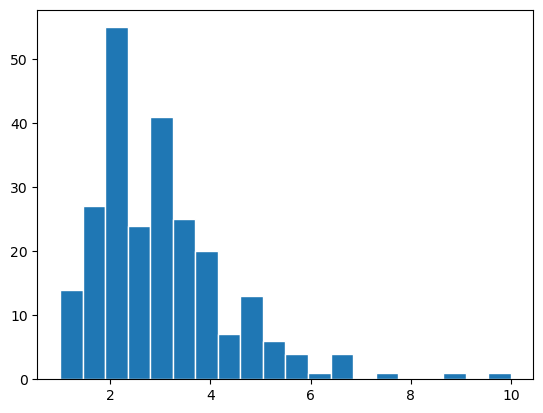

In [3]:
plt.hist(tip['tip'], bins=20, edgecolor='w')
plt.show()

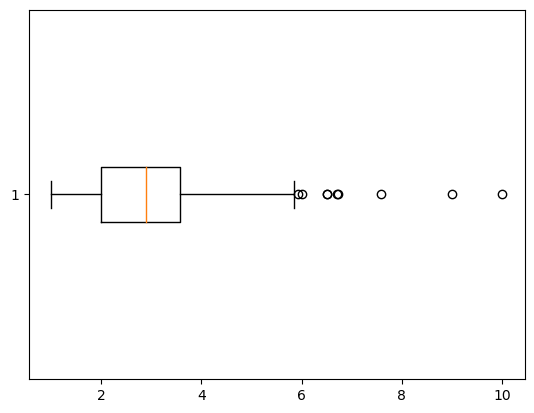

In [4]:
plt.boxplot(tip['tip'], vert=False)
plt.show()

<img src='https://raw.githubusercontent.com/Jangrae/img/master/boxplot03.png' width=700 align="left"/>

## 6.2.가변수(Dummy Variable) 만들기

- 가변수는 일정하게 정해진 범위의 값을 갖는 데이터(범주형 데이터)를 독립된 열로 변환한 것입니다.
- 특히 범주형 문자열 데이터는 머신러닝 알고리즘에 사용하려면 숫자로 변환해야 합니다.
- 가변수를 만드는 과정을 **One-Hot-Encoding** 이라고 부르기도 합니다.
- **get_dummies()** 함수를 사용해서 가변수를 쉽게 만들 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/get_dummies1.png' width=700 align="left"/>

In [9]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/tips.csv'
tip = pd.read_csv(path)

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 6.2.1.범주형 변수 확인

- 범주형 여부를 우선 확인해야 합니다.
- 문자열 값을 갖는 열이 범수형 값을 갖는 경우가 많습니다.

In [6]:
# 열 확인
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 6.2.2.변수 개별 처리

- columns 옵션에 열을 하나 지정해 처리할 수 있습니다.
- 자동으로 원본 열이 제거되고, 열 이름이 prefix로 사용됩니다.
- 다중공선성 문제를 없애기 위해 **drop_first=True** 옵션을 지정합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/get_dummies2.png' width=600 align="left"/>

<img src='https://raw.githubusercontent.com/Jangrae/img/master/multicollinearity.png' width=500 align="left"/>

In [10]:
# 가변수화: sex
dumm_cols = ['sex']
tip = pd.get_dummies(tip, columns=dumm_cols, drop_first=True)

# 확인
tip.head()

,total_bill,tip,smoker,day,time,size,sex_Male
0,16.99,1.01,No,Sun,Dinner,2,0
1,10.34,1.66,No,Sun,Dinner,3,1
2,21.01,3.50,No,Sun,Dinner,3,1
3,23.68,3.31,No,Sun,Dinner,2,1
4,24.59,3.61,No,Sun,Dinner,4,0


### 6.2.3.일괄 처리

- columns 옵션에 대상 열을 **리스트**로 지정해 한 번에 처리합니다.
- 자동으로 열 이름이 prefix로 지정되며 원본 열이 제거됩니다.
- columns 옵션을 지정하지 않으면 문자열 값을 갖는 열 모두를 대상으로 합니다.

In [11]:
# 여러 범주형 변수를 가변수화: smoker, day, time
dumm_cols = ['smoker', 'day', 'time']
tip = pd.get_dummies(tip, dumm_cols, drop_first=True)

# 확인
tip.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0
